In [4]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
import time
from scipy.stats import linregress
from config import weather_api_key

In [3]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)

In [57]:
#Create a list for holding the cities
cities =[]
coordinates = list(lat_lngs)

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

632

In [58]:
#Create an endpoint URL for a city
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [59]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the ciites in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        city_weather = requests.get(city_url).json()
    
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO format
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
    
        #Append the city information into city_data list.
        city_data.append({"City":city.title(),
                          "Lat": city_lat,
                          "Long": city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
    except:
        print(f"City {city} not found. Skipping...")
        pass

#Indicate that data loading is complete.
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | bonavista
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | pavino
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | thinadhoo
Processing Record 11 of Set 1 | cabedelo
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | mitu
Processing Record 14 of Set 1 | upala
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | christchurch
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | celestun
Processing Record 21 of Set 1 | asau
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | goundam
Processing Rec

Processing Record 38 of Set 4 | cabo san lucas
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | turukhansk
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | straldza
City straldza not found. Skipping...
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | ngukurr
City ngukurr not found. Skipping...
Processing Record 46 of Set 4 | mys shmidta
City mys shmidta not found. Skipping...
Processing Record 47 of Set 4 | vaitupu
City vaitupu not found. Skipping...
Processing Record 48 of Set 4 | kousseri
Processing Record 49 of Set 4 | luangwa
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | oswiecim
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | dikson
Processing Record 4 of Set 5 | toucheng
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | buala
Processing Record 7 of Set 5 | citluk
Processing Record 8 of Set 5 | rudnichnyy

Processing Record 26 of Set 8 | cabildo
Processing Record 27 of Set 8 | san lorenzo
Processing Record 28 of Set 8 | pathein
Processing Record 29 of Set 8 | gat
Processing Record 30 of Set 8 | patea
Processing Record 31 of Set 8 | kirkland lake
Processing Record 32 of Set 8 | gabao
Processing Record 33 of Set 8 | gushikawa
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | wick
Processing Record 36 of Set 8 | kropotkin
Processing Record 37 of Set 8 | cockburn town
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | vidim
Processing Record 40 of Set 8 | kamenka
Processing Record 41 of Set 8 | samusu
City samusu not found. Skipping...
Processing Record 42 of Set 8 | imbituba
Processing Record 43 of Set 8 | labuhan
Processing Record 44 of Set 8 | alibag
Processing Record 45 of Set 8 | butembo
Processing Record 46 of Set 8 | traralgon
Processing Record 47 of Set 8 | kirkwall
Processing Record 48 of Set 8 | salair
Processing Record 49 of Set 8 | ovre

Processing Record 12 of Set 12 | northam
Processing Record 13 of Set 12 | sibu
Processing Record 14 of Set 12 | bria
Processing Record 15 of Set 12 | nizhneyansk
City nizhneyansk not found. Skipping...
Processing Record 16 of Set 12 | mongagua
Processing Record 17 of Set 12 | rawannawi
City rawannawi not found. Skipping...
Processing Record 18 of Set 12 | pemangkat
Processing Record 19 of Set 12 | plettenberg bay
Processing Record 20 of Set 12 | charyshskoye
Processing Record 21 of Set 12 | wazzan
City wazzan not found. Skipping...
Processing Record 22 of Set 12 | bauchi
Processing Record 23 of Set 12 | dalmatovo
Processing Record 24 of Set 12 | puerto escondido
Processing Record 25 of Set 12 | vokhtoga
Processing Record 26 of Set 12 | maniitsoq
Processing Record 27 of Set 12 | maceio
Processing Record 28 of Set 12 | jalu
Processing Record 29 of Set 12 | hovd
Processing Record 30 of Set 12 | kamenskoye
City kamenskoye not found. Skipping...
Processing Record 31 of Set 12 | seoul
Proces

In [63]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.65,-53.11,30.00,86,100,3.00,CA,2020-04-04 20:08:41
1,Jamestown,42.10,-79.24,59.00,54,90,5.82,US,2020-04-04 20:04:23
2,Mataura,-46.19,168.86,53.01,82,77,4.00,NZ,2020-04-04 20:08:41
3,Pavino,59.11,46.14,29.16,96,63,7.25,RU,2020-04-04 20:08:41
4,Rikitea,-23.12,-134.97,76.37,79,91,14.74,PF,2020-04-04 20:08:41
...,...,...,...,...,...,...,...,...,...
579,Ligayan,4.65,119.47,83.35,67,2,3.87,PH,2020-04-04 20:09:42
580,Visnes,59.36,5.22,44.60,87,100,11.41,NO,2020-04-04 20:09:42
581,Sandnessjoen,66.02,12.63,28.40,74,100,8.05,NO,2020-04-04 20:09:42
582,Rock Sound,24.90,-76.20,74.30,53,0,7.40,BS,2020-04-04 20:09:43


In [64]:
new_column_order = ["City","Country", "Date", "Lat", "Long", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [65]:
city_data_df 

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonavista,CA,2020-04-04 20:08:41,48.65,-53.11,30.00,86,100,3.00
1,Jamestown,US,2020-04-04 20:04:23,42.10,-79.24,59.00,54,90,5.82
2,Mataura,NZ,2020-04-04 20:08:41,-46.19,168.86,53.01,82,77,4.00
3,Pavino,RU,2020-04-04 20:08:41,59.11,46.14,29.16,96,63,7.25
4,Rikitea,PF,2020-04-04 20:08:41,-23.12,-134.97,76.37,79,91,14.74
...,...,...,...,...,...,...,...,...,...
579,Ligayan,PH,2020-04-04 20:09:42,4.65,119.47,83.35,67,2,3.87
580,Visnes,NO,2020-04-04 20:09:42,59.36,5.22,44.60,87,100,11.41
581,Sandnessjoen,NO,2020-04-04 20:09:42,66.02,12.63,28.40,74,100,8.05
582,Rock Sound,BS,2020-04-04 20:09:43,24.90,-76.20,74.30,53,0,7.40


In [66]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the City data into a CSV
city_data_df.to_csv(output_data_file, index_label ="City_ID")

In [112]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df ["Lat"]
max_temps = city_data_df ["Max Temp"]
humidity = city_data_df ["Humidity"]
cloudiness =city_data_df ["Cloudiness"]
wind_speed =city_data_df ["Wind Speed"]

In [113]:
#Get today's date in seconds
today = time.strftime("%x")
today

'04/04/20'

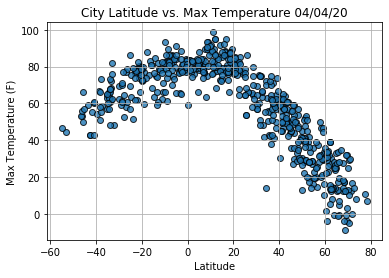

In [114]:
#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid("True")

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

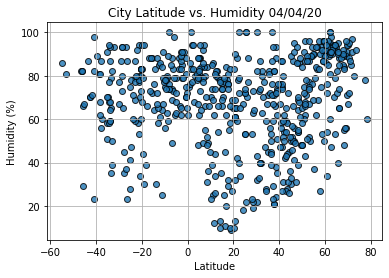

In [115]:
#Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid("True")

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

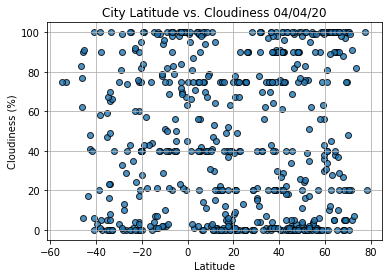

In [116]:
#Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid("True")

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

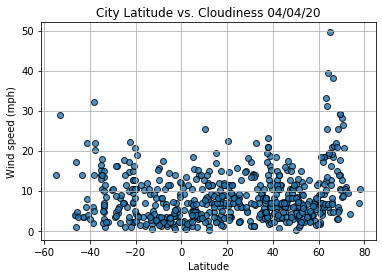

In [117]:
#Build the scatter plot for latitude vs. Wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid("True")

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [176]:
#Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
    
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [177]:
nothern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

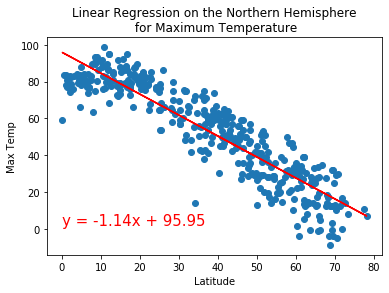

In [188]:
#Linear regression on the Nothern Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values =nothern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression (x_values, y_values,
                        "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (0,2))

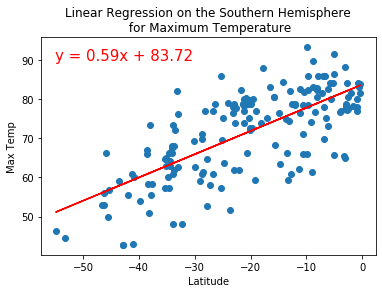

In [189]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression (x_values, y_values, 
                        "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-55,90))

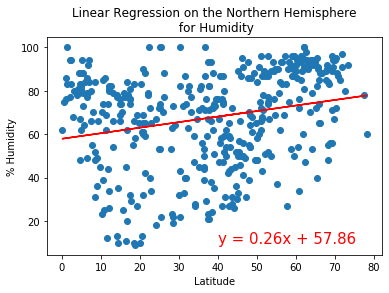

In [222]:
#Linear regression on the Nothern Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values =nothern_hemi_df["Humidity"]

#Call the function
plot_linear_regression (x_values, y_values,
                    "Linear Regression on the Northern Hemisphere\n for Humidity", "% Humidity", (40,10))

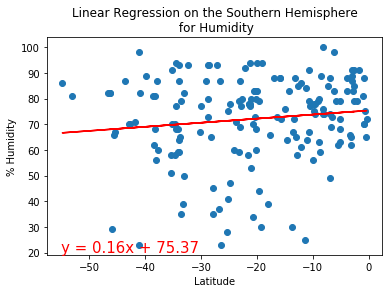

In [223]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression (x_values, y_values, 
                        "Linear Regression on the Southern Hemisphere\n for Humidity", "% Humidity", (-55,20))

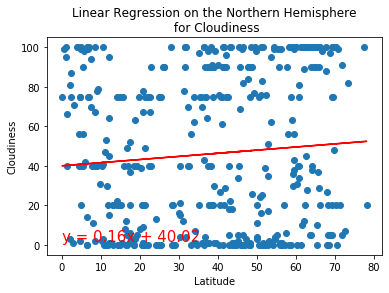

In [205]:
#Linear regression on the Nothern Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values =nothern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression (x_values, y_values,
                        "Linear Regression on the Northern Hemisphere\n for Cloudiness", "Cloudiness", (0,2))

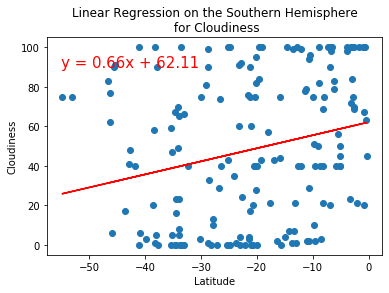

In [206]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression (x_values, y_values, 
                        "Linear Regression on the Southern Hemisphere\n for Cloudiness", "Cloudiness", (-55,90))

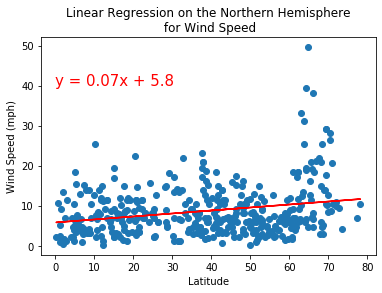

In [212]:
#Linear regression on the Nothern Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values =nothern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression (x_values, y_values,
                        "Linear Regression on the Northern Hemisphere\n for Wind Speed", "Wind Speed (mph)", (0,40))

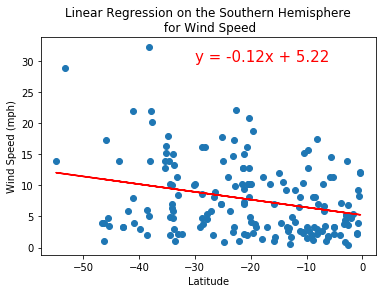

In [221]:
#Linear regression on the Nothern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression (x_values, y_values,
                        "Linear Regression on the Southern Hemisphere\n for Wind Speed", "Wind Speed (mph)", (-30,30))